Task 4.10

Index:

1)Importing the newest version of the data set

2)Assessing possible security implication with the data set

3a) Creating a new data column that sorts US states into regions

3b) Using regions to determine spending differences

4)Creating a new flag for low rev generating customers, and removing from data

5)Creating a new customer profile

6)Visualizations of new profile

7)The descriptive stats of customer profiles

8)Comparing customer profiles across regions and departments & Creating charts of results

9)Exporting Final Dfs and visualizations

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

1) Importing the newest version of the data set

In [5]:
path = r'/Users/ethanahennes/Desktop/instacart basket analysis'

In [6]:
df_Combined = pd.read_pickle(os.path.join(path,'02 Data','Pepared Data','4.9 Joined with Customer.pkl'))

2) Assessing possible security implication with the data set

-The First and Last names of customers is an example of PII data that would need to be decided on by a senior analysis

-I will assign regions by adding a new coulmn and filterignt he states into the new coulmn by region

3) A. Creating a new data column that sorts US states into regions

In [7]:
#Crerating a df to test
df_test =  df_Combined 

In [9]:
#Making a new Column 'region' by first making a region dictionary that assigns the states to their region

region = {
    'Maine': 'Northeast',
    'New Hampshire':'Northeast',
    'Vermont':'Northeast',
    'Massachusetts':'Northeast',
    'Rhode Island':'Northeast',
    'Connecticut':'Northeast',
    'New York':'Northeast',
    'Pennsylvania':'Northeast',
    'New Jersey':'Northeast',
    'Wisconsin':'Midwest',
    'Michigan':'Midwest',
    'Illinois':'Midwest',
    'Indiana':'Midwest',
    'Ohio':'Midwest',
    'North Dakota':'Midwest',
    'South Dakota':'Midwest',
    'Nebraska':'Midwest',
    'Kansas':'Midwest',
    'Minnesota':'Midwest',
    'Iowa':'Midwest',
    'Missouri':'Midwest',
    'Delaware':'South',
    'Maryland':'South',
    'District of Columbia':'South',
    'Virginia':'South',
    'West Virginia':'South',
    'North Carolina':'South',
    'South Carolina':'South',
    'Georgia':'South',
    'Florida':'South',
    'Kentucky':'South',
    'Tennessee':'South',
    'Mississippi':'South',
    'Alabama':'South',
    'Oklahoma':'South',
    'Texas':'South',
    'Arkansas':'South',
    'Louisiana':'South',
    'Idaho':'West',
    'Montana':'West',
    'Wyoming':'West',
    'Nevada':'West',
    'Utah':'West',
    'Colorado':'West',
    'Arizona':'West',
    'New Mexico':'West',
    'Alaska':'West',
    'Washington':'West',
    'Oregon':'West',
    'California':'West',
    'Hawaii':'West'
}

In [10]:
def get_region(STATE):
    return region[STATE]

df_test['region'] =df_test['STATE'].apply(get_region)

In [11]:
#Testing New Regions column
df_test['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

3) B. Using regions to determine spending differences

Creating a Cross tab to examine the relationship between 'region' and 'spending'

In [13]:
crosstab_region=pd.crosstab(df_test['region'], df_test['price_flag'],dropna=False)
       
          
          

In [14]:
crosstab_region

price_flag,High Spender,Low spender
region,,
Midwest,155932,7441350
Northeast,108180,5614511
South,209481,10582194
West,160271,8132559


From the cross tab we can see the 'south' region contributes the most to both the highest amount of 'high spending' customers and 'low spending' customers. 

In [15]:
df_test.loc[df_test['max_order'] < 5, 'loyalty_flag'] = 'low customer'

In [16]:
df_test['loyalty_flag'].value_counts(dropna=False)

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
low customer         1440295
Name: loyalty_flag, dtype: int64

Per instructions from my CFO I will remove the 1,440,295 records of customer’s with orders under 5.

df_test = all customers / df_new = dropped low customers

In [17]:
df_new = df_test

In [18]:
#Getting a pre drop count
df_new.shape

(32404859, 37)

In [19]:
#dropping all low customers
df_new = df_new[df_new['loyalty_flag'].str.contains('low customer')==False]

In [20]:
#Checking new demensions to make sure it reflects -1,440,295  records
df_new.shape

(30964564, 37)

In [21]:
df_new['loyalty_flag'].value_counts(dropna=False)

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

In [ ]:
#32404859 - 30964564 = 1440295
#The correct amount has been dropped

5) Creating a new customer profile

Creating a new customer profile by crating a new subset

"Student" profile

Age: <= 25

income: < 6.729200e+04 (67,292.00)

'department_id'(19'snacks').count:>5

Dependants: = 0

In [23]:
df_student = df_new.loc[(df_new['Age']<= 25) 
                        & (df_new['income']< 67292)
                        & (df_new['department_id'] == 19) 
                        & (df_new['n_dependants']== 0)]

In [25]:
df_student.groupby(['user_id'])['department_id'].transform('count')

55           24
200         377
262         111
263         111
264         111
           ... 
32302791     19
32305957     37
32306006      2
32306007      2
32306029      8
Name: department_id, Length: 46047, dtype: int64

In [24]:
df_student[['department_id']].groupby(df_student['user_id']).count()

,department_id
user_id,
79,6
83,25
123,10
423,14
453,1
...,...
205923,6
205999,61
206028,11


This was the code I used to investigate the amount of snack purchases by count and would then end up being the code I used to create my new row.

In [25]:
df_student['total snacks'] = df_student['department_id'].groupby(df_student['user_id']).transform('count')


/var/folders/mq/hhjm7ws955lfb2x1lvpg6fj80000gn/T/ipykernel_15934/1884254883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student['total snacks'] = df_student['department_id'].groupby(df_student['user_id']).transform('count')


In [26]:
df_student.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,...,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,total snacks
55,0,1,Chocolate Sandwich Cookies,61,19,5.8,66740,66740,2735922,4141,...,Tapia,Female,Florida,25,1/16/2020,0,single,29652,South,24
200,0,1,Chocolate Sandwich Cookies,61,19,5.8,308143,308143,475785,18631,...,Leon,Male,Iowa,21,8/6/2019,0,single,31479,Midwest,377
262,0,1,Chocolate Sandwich Cookies,61,19,5.8,404385,404385,390978,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111
263,0,1,Chocolate Sandwich Cookies,61,19,5.8,404393,404393,3120986,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111
264,0,1,Chocolate Sandwich Cookies,61,19,5.8,404394,404394,798811,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111


Checking the new df 

In [54]:
df_student = df_student.drop(columns=['count of snacks'])

Deleting the incorrect first attempt row

In [27]:
df_student.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,...,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,total snacks
55,0,1,Chocolate Sandwich Cookies,61,19,5.8,66740,66740,2735922,4141,...,Tapia,Female,Florida,25,1/16/2020,0,single,29652,South,24
200,0,1,Chocolate Sandwich Cookies,61,19,5.8,308143,308143,475785,18631,...,Leon,Male,Iowa,21,8/6/2019,0,single,31479,Midwest,377
262,0,1,Chocolate Sandwich Cookies,61,19,5.8,404385,404385,390978,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111
263,0,1,Chocolate Sandwich Cookies,61,19,5.8,404393,404393,3120986,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111
264,0,1,Chocolate Sandwich Cookies,61,19,5.8,404394,404394,798811,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111


checking the new df

In [28]:
df_student_2 = df_student[df_student['total snacks'] >= 5]

In [29]:
df_student_2.head(20)

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,...,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,total snacks
55,0,1,Chocolate Sandwich Cookies,61,19,5.8,66740,66740,2735922,4141,...,Tapia,Female,Florida,25,1/16/2020,0,single,29652,South,24
200,0,1,Chocolate Sandwich Cookies,61,19,5.8,308143,308143,475785,18631,...,Leon,Male,Iowa,21,8/6/2019,0,single,31479,Midwest,377
262,0,1,Chocolate Sandwich Cookies,61,19,5.8,404385,404385,390978,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111
263,0,1,Chocolate Sandwich Cookies,61,19,5.8,404393,404393,3120986,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111
264,0,1,Chocolate Sandwich Cookies,61,19,5.8,404394,404394,798811,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111
265,0,1,Chocolate Sandwich Cookies,61,19,5.8,404395,404395,298451,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111
266,0,1,Chocolate Sandwich Cookies,61,19,5.8,404397,404397,3016682,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111
267,0,1,Chocolate Sandwich Cookies,61,19,5.8,404398,404398,2737232,24324,...,Hawkins,Male,Washington,24,2/28/2020,0,single,29885,West,111
576,0,1,Chocolate Sandwich Cookies,61,19,5.8,1059283,1059283,1679947,63786,...,Stevenson,Male,Minnesota,23,5/18/2017,0,single,41217,Midwest,151
577,0,1,Chocolate Sandwich Cookies,61,19,5.8,1059284,1059284,466821,63786,...,Stevenson,Male,Minnesota,23,5/18/2017,0,single,41217,Midwest,151


With this new peramiter apllied we now have a new profile which displace users who match the criteria for the 'student' profile.

In [30]:
#showing the distribution of students based on region
df_student_2['region'].value_counts()

South        15027
West         11306
Midwest       9644
Northeast     8543
Name: region, dtype: int64

6) Visualizations of new profile

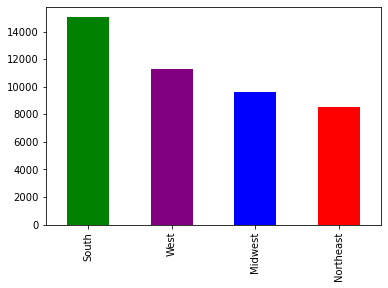

In [32]:
#creating a visual to show distribution of students by region
student_bar = df_student_2['region'].value_counts().plot.bar(color = ['green','purple','blue','red'])

From the graph of we can see the distribution of students is concentrated the most in the South and the least in the Northeast region

7) The descriptive stats of customer profiles

In [34]:
df_student_2['total snacks'].describe()

count    44520.000000
mean        85.175247
std        106.372815
min          5.000000
25%         22.000000
50%         45.000000
75%        105.000000
max        634.000000
Name: total snacks, dtype: float64

Above we can see that the Max amount of orders in the "Student" profile is 634 orders. The average is 85 orders, and the minimum is 5 orders.

In [35]:
df_student_2['prices'].describe()

count    44520.000000
mean         4.246071
std          1.569816
min          1.600000
25%          2.900000
50%          4.200000
75%          5.500000
max          7.000000
Name: prices, dtype: float64

Above we can see that the Max price for a snack product is $7, the average price is $4 and the min price is $1.60

In [37]:
df_new['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

8) Comparing customer profiles across regions and departments & Creating charts of results

In [43]:
#Lets explore the 'loyalty flag' profile and see if there are any departments loyal customers seem to favor
df_new.groupby(['department_id','loyalty_flag']).size().reset_index(name='count')


,department_id,loyalty_flag,count
0,1,Loyal customer,609460
1,1,New customer,372271
2,1,Regular customer,1140000
3,2,Loyal customer,10715
4,2,New customer,5839
...,...,...,...
58,20,New customer,158335
59,20,Regular customer,521453
60,21,Loyal customer,18350
61,21,New customer,12713


In [44]:
df_group = df_new.groupby(['department_id','loyalty_flag']).size().reset_index(name='count')

In [45]:
df_group.pivot(index = 'department_id',columns = 'loyalty_flag', values = 'count')

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,609460,372271,1140000
2,10715,5839,17857
3,379873,172104,568851
4,3147376,1336604,4595293
5,38723,28629,77275
6,78394,43841,133756
7,855017,396649,1320235
8,25469,15880,51711
9,242580,144836,434720


From the table above we can see that loyal customers purchase from the produce department most frequently. This means the as a proportion 30% of all orders from loyal customers come from the produce department.

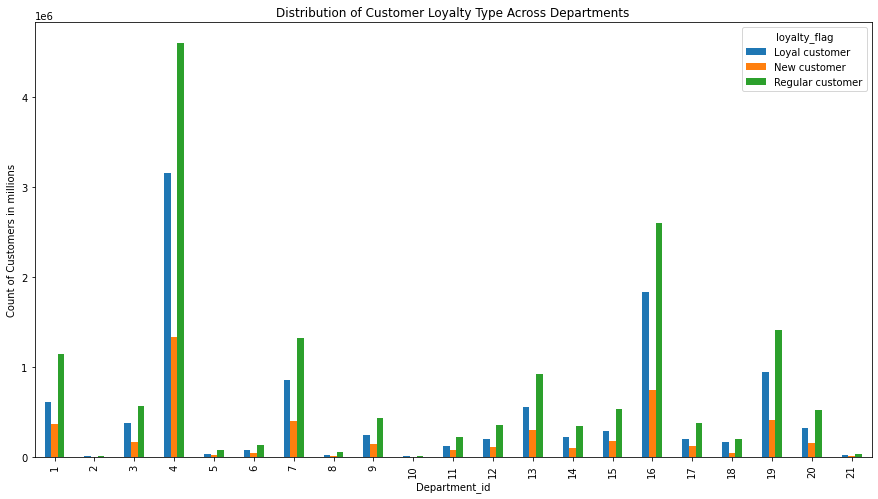

In [61]:
dperartment_bar = df_group.pivot(index = 'department_id',columns = 'loyalty_flag', values = 'count').plot(kind = 'bar',figsize = (15,8))

plt.xlabel('Department_id')
plt.ylabel('Count of Customers in millions')
plt.title('Distribution of Customer Loyalty Type Across Departments')
plt.show()

Above the visualization shows the distribution of customer loyalty flags across the departments

In [53]:
# Exploring where the highest spenders are by region
df_new.groupby(['region','price_flag']).size().reset_index(name='count')

,region,price_flag,count
0,Midwest,High Spender,148670
1,Midwest,Low spender,7112835
2,Northeast,High Spender,103120
3,Northeast,Low spender,5361565
4,South,High Spender,199225
5,South,Low spender,10111800
6,West,High Spender,152269
7,West,Low spender,7774939


In [52]:
df_new.groupby(['region','price_flag']).size().reset_index(name='count')

,region,price_flag,count
0,Midwest,High Spender,148670
1,Midwest,Low spender,7112835
2,Northeast,High Spender,103120
3,Northeast,Low spender,5361565
4,South,High Spender,199225
5,South,Low spender,10111800
6,West,High Spender,152269
7,West,Low spender,7774939


In [54]:
df_price_region = df_new.groupby(['region','price_flag']).size().reset_index(name='count')

In [55]:
df_price_region.pivot(index = "region", columns = 'price_flag', values = 'count')

price_flag,High Spender,Low spender
region,,
Midwest,148670,7112835
Northeast,103120,5361565
South,199225,10111800
West,152269,7774939


This chart shows the numerical distribution of high spenders vs low spenders across the US regions

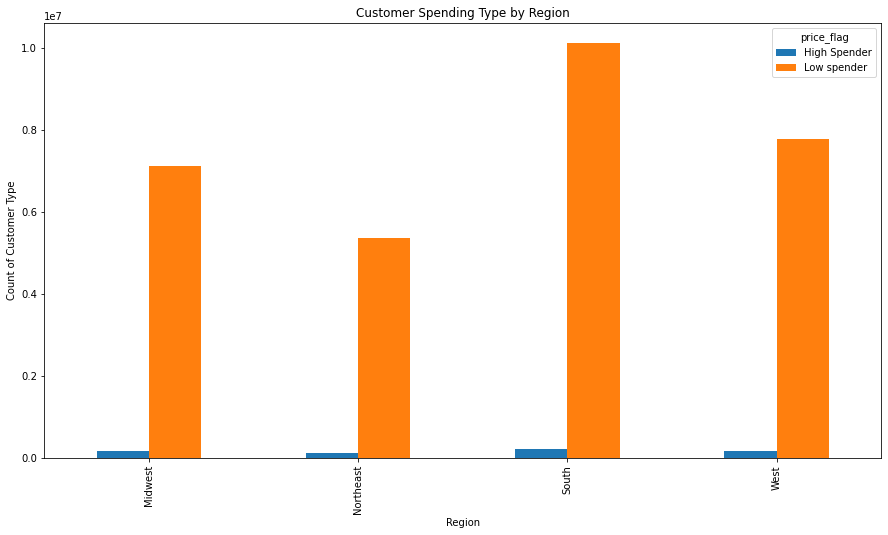

In [62]:
bar_price_region = df_price_region.pivot(index = "region", columns = 'price_flag', values = 'count').plot(kind = 'bar', figsize = (15,8))

plt.xlabel('Region')
plt.ylabel('Count of Customer Type')
plt.title('Customer Spending Type by Region')

          
                                                                                                        

plt.show()
                                                                                                          

In this visual we are again seeing the highest distribution is in the southern region

In [63]:
df_new['fam_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [66]:
df_new['n_dependants'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: n_dependants, dtype: int64

In [67]:
#exploring if the 'n_dependants' effects what products people buy
df_new.groupby(['department_id','n_dependants']).size().reset_index(name='count')

,department_id,n_dependants,count
0,1,0,529348
1,1,1,525949
2,1,2,534026
3,1,3,532408
4,2,0,8714
...,...,...,...
79,20,3,252592
80,21,0,15935
81,21,1,16013
82,21,2,16385


In [68]:
df_group_dependants = df_new.groupby(['department_id','n_dependants']).size().reset_index(name='count')

In [72]:
df_group_dependants.pivot(index = 'department_id',columns = 'n_dependants', values = 'count')

n_dependants,0,1,2,3
department_id,,,,
1,529348,525949,534026,532408
2,8714,8720,8600,8377
3,281395,280390,279221,279822
4,2275441,2258458,2257655,2287719
5,36827,35799,34668,37333
6,64461,64753,63304,63473
7,645341,638747,646886,640927
8,23602,23815,22501,23142
9,204296,204798,204630,208412


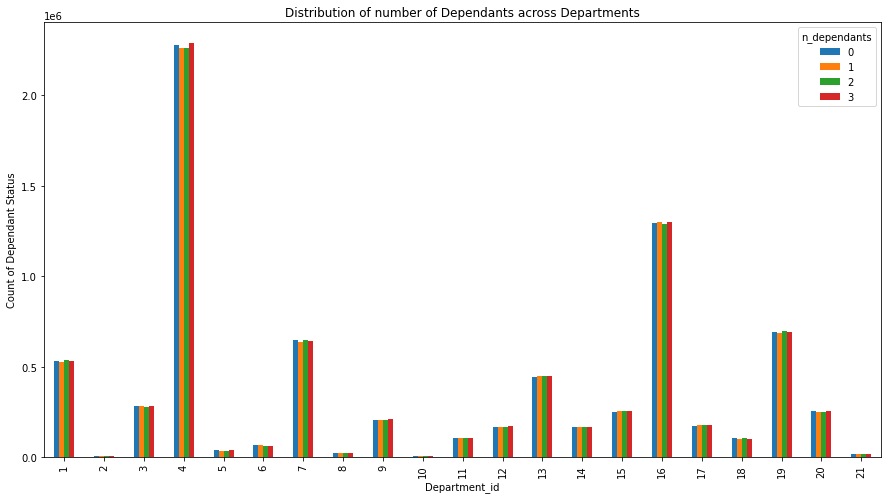

In [84]:
bar_group_dependants = df_group_dependants.pivot(index = 'department_id',columns = 'n_dependants', values = 'count').plot(kind='bar' ,figsize=(15,8))

plt.xlabel('Department_id')
plt.ylabel('Count of Dependant Status')
plt.title('Distribution of number of Dependants across Departments')
plt.show()




As we can see the distribution of the number of dependents a customer has and the departments they shop in appear to be even distributed

In [76]:
#exploring to see if time of day affects what department get orders
df_new.groupby(['department_id','order_hour_of_day']).size().reset_index(name='count')

,department_id,order_hour_of_day,count
0,1,0,14789
1,1,1,8428
2,1,2,5083
3,1,3,3896
4,1,4,3961
...,...,...,...
499,21,19,2611
500,21,20,1942
501,21,21,1631
502,21,22,1325


In [77]:
df_group_hour_department = df_new.groupby(['department_id','order_hour_of_day']).size().reset_index(name='count')

In [78]:
df_group_hour_department.pivot(index = 'department_id',columns = 'order_hour_of_day', values = 'count')

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
department_id,,,,,,,,,,,,,,,,,,,,,
1,14789,8428,5083,3896,3961,6195,18626,54756,100888,140394,...,176709,179170,175307,152152,123855,95617,70341,52331,40791,26354
2,232,129,113,67,62,99,305,877,1736,2519,...,2871,2846,2694,2410,1872,1427,1039,814,624,413
3,6958,3576,2282,1734,1824,2967,10415,33029,61396,85519,...,93485,93399,89367,73258,56552,42816,32517,26037,20293,12822
4,65073,33345,18986,13729,14664,25924,84649,260886,494234,688956,...,752732,741277,701558,565626,439144,338476,275542,238470,194170,121321
5,465,293,246,177,175,260,645,2021,5046,9831,...,14140,14263,13455,11328,8251,5467,3149,1819,1318,822
6,1795,961,558,483,427,672,2151,6215,12117,17780,...,22029,21950,20747,16635,12532,9511,7454,6178,5269,3408
7,16652,9518,5890,4468,4584,7108,22202,66553,135182,211187,...,211658,208913,200128,166305,131501,100235,72229,53367,41463,28520
8,642,416,247,252,269,302,948,2389,4298,6087,...,7534,7519,7750,7037,5913,4496,2847,1912,1375,950
9,5545,2884,1699,1221,1379,2059,7263,22399,41331,56523,...,70327,69959,66290,54577,42164,32068,24689,20799,16915,10264


The Table above is busy but shows the order frequency per department by hour of day. This table would be more easily graphable in excel.

9) Exporting Final Dfs and visualizations

In [86]:
#Saving all the figures
student_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','student_bar.png'))

In [87]:
dperartment_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','dperartment_bar.png'))

In [88]:
bar_price_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_price_region.png'))

In [89]:
bar_group_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_group_dependants.png'))

In [90]:
df_student.to_pickle(os.path.join(path,'02 Data','Pepared Data','4.10 student_profile.pkl'))

In [91]:
df_student_2.to_pickle(os.path.join(path,'02 Data','Pepared Data','4.10 student_profile.pkl'))



In [92]:
df_group.to_pickle(os.path.join(path,'02 Data','Pepared Data','4.10 department_by_loyalty.pkl'))



In [93]:
df_price_region.to_pickle(os.path.join(path,'02 Data','Pepared Data','4.10 regions_by_spending_avrg.pkl'))



In [95]:
df_group_dependants.to_pickle(os.path.join(path,'02 Data','Pepared Data','4.10 departments_by_depndants.pkl'))


In [96]:
df_group_hour_department.to_pickle(os.path.join(path,'02 Data','Pepared Data','4.10 departments_by_hour_of_day_freq.pkl'))


In [97]:
df_new.to_pickle(os.path.join(path,'02 Data','Pepared Data','4.10 Final_Whole_Data_set.pkl'))

In [98]:
df_group_hour_department.to_csv(os.path.join(path,'02 data','Pepared Data','df_group_hour_department.csv'))


In [99]:
df_student_2.to_csv(os.path.join(path,'02 data','Pepared Data','df_student_2.csv'))






In [100]:
df_group.to_csv(os.path.join(path,'02 data','Pepared Data','dept_id_vs_loyalty.csv'))



In [101]:
df_price_region.to_csv(os.path.join(path,'02 data','Pepared Data','spending_by_region.csv'))



In [102]:
df_group_dependants.to_csv(os.path.join(path,'02 data','Pepared Data','dept_by_depend.csv'))